In [1]:
#Please import here all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import sqrt
import plotly.graph_objects as go
import os
import datacube
from scipy.stats import loguniform, uniform
from matplotlib.pyplot import figure
import geopandas as gpd
import rioxarray as rio
from rasterio.plot import show
import rasterio
import xarray as xr

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

# Get Data Using ODC

In [2]:
dc = datacube.Datacube(app = 'my_app', config = '/home/asi/datacube_conf/datacube.conf')
list_of_products = dc.list_products()
list_of_products

name                          description  \
name                                                                        
PRISMA_Full_Bands  PRISMA_Full_Bands  PRISMA imagery containing all bands   

                  license default_crs default_resolution  
name                                                      
PRISMA_Full_Bands    None  EPSG:32632          (-30, 30)

In [1]:
product_PRISMA = 'PRISMA_Full_Bands'
ds_PRISMA = dc.load(product = product_PRISMA, output_crs="epsg:32632", resolution=[30,30])
ds_PRISMA

NameError: name 'dc' is not defined

In [24]:
A = ds_PRISMA.sel(time='2023-02-09T10:30:00.000000000')
A

<xarray.Dataset>
Dimensions:      (y: 1207, x: 1232)
Coordinates:
    time         datetime64[ns] 2023-02-09T10:30:00
  * y            (y) float64 5.014e+06 5.014e+06 5.014e+06 ... 5.05e+06 5.05e+06
  * x            (x) float64 4.888e+05 4.889e+05 ... 5.257e+05 5.258e+05
    spatial_ref  int32 32632
Data variables: (12/239)
    band1        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band2        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band3        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band4        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band5        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band6        (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ...           ...
    band234      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band235      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band236      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band237      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band238      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    band239      (y, x) float32 nan 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

In [7]:
red_band = ds_PRISMA.sel(time='2023-02-09T10:30:00.000000000', method='nearest')['band32']
green_band = ds_PRISMA.sel(time='2023-02-09T10:30:00.000000000', method='nearest')['band22']
blue_band = ds_PRISMA.sel(time='2023-02-09T10:30:00.000000000', method='nearest')['band11'] 

In [8]:
rgb_array = xr.concat([red_band, green_band, blue_band], dim='band').transpose('y', 'x', 'band')
rgb_array = rgb_array[::-1, :, :]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


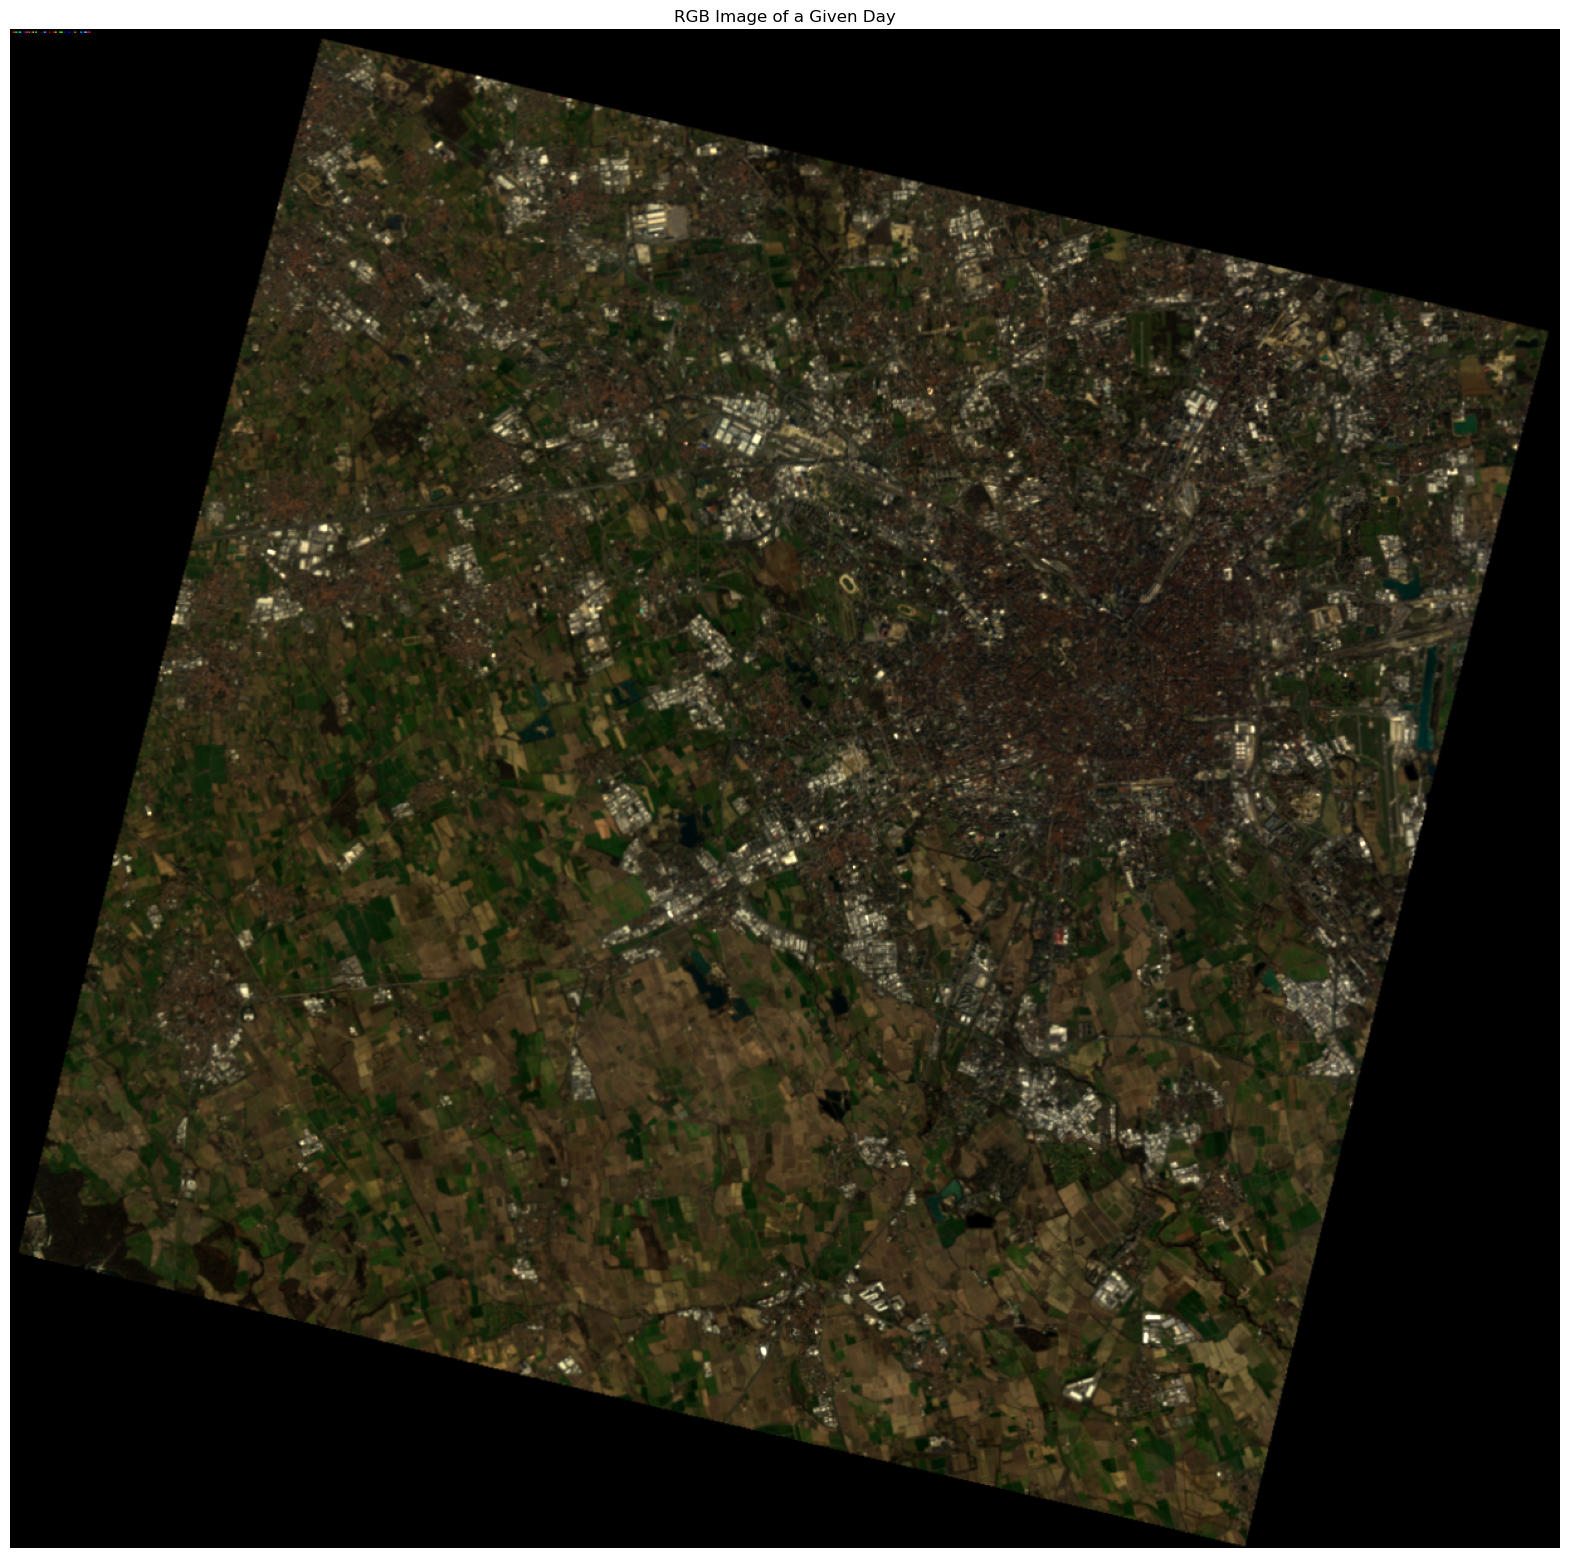

In [9]:
# Plot the RGB image
plt.figure(figsize = (20,20))
plt.imshow(rgb_array*3)
plt.title('RGB Image of a Given Day')
plt.axis('off')
plt.show()

----

In [12]:
product_climami = 'climami'
ds_climami = dc.load(product = product_climami, output_crs="epsg:32632", resolution=[30,30])
ds_climami

<xarray.Dataset>
Dimensions:                               (time: 1, y: 2262, x: 2379)
Coordinates:
  * time                                  (time) datetime64[ns] 2023-02-09T10...
  * y                                     (y) float64 4.992e+06 ... 5.06e+06
  * x                                     (x) float64 4.765e+05 ... 5.478e+05
    spatial_ref                           int32 32632
Data variables:
    raster_massima_ESTATE_UHI_2200        (time, y, x) float32 nan nan ... nan
    raster_massima_ONDATA_DI_CALORE_1100  (time, y, x) float32 nan nan ... nan
    raster_massima_ONDATA_DI_CALORE_2200  (time, y, x) float32 nan nan ... nan
    raster_media_ESTATE_UHI_2200          (time, y, x) float32 nan nan ... nan
    raster_media_INVERNO_UHI_1100         (time, y, x) float32 nan nan ... nan
    raster_media_INVERNO_UHI_2200         (time, y, x) float32 nan nan ... nan
    raster_media_ONDATA_DI_CALORE_1100    (time, y, x) float32 nan nan ... nan
    raster_media_ONDATA_DI_CALORE_2200    (time, y, x) float32 nan nan ... nan
    raster_minima_INVERNO_UHI_1100        (time, y, x) float32 nan nan ... nan
    raster_minima_INVERNO_UHI_2200        (time, y, x) float32 nan nan ... nan
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

In [13]:
climami_test = ds_climami.sel(time='2023-02-09T10:30:00.000000000', method='nearest')['raster_media_ONDATA_DI_CALORE_1100']

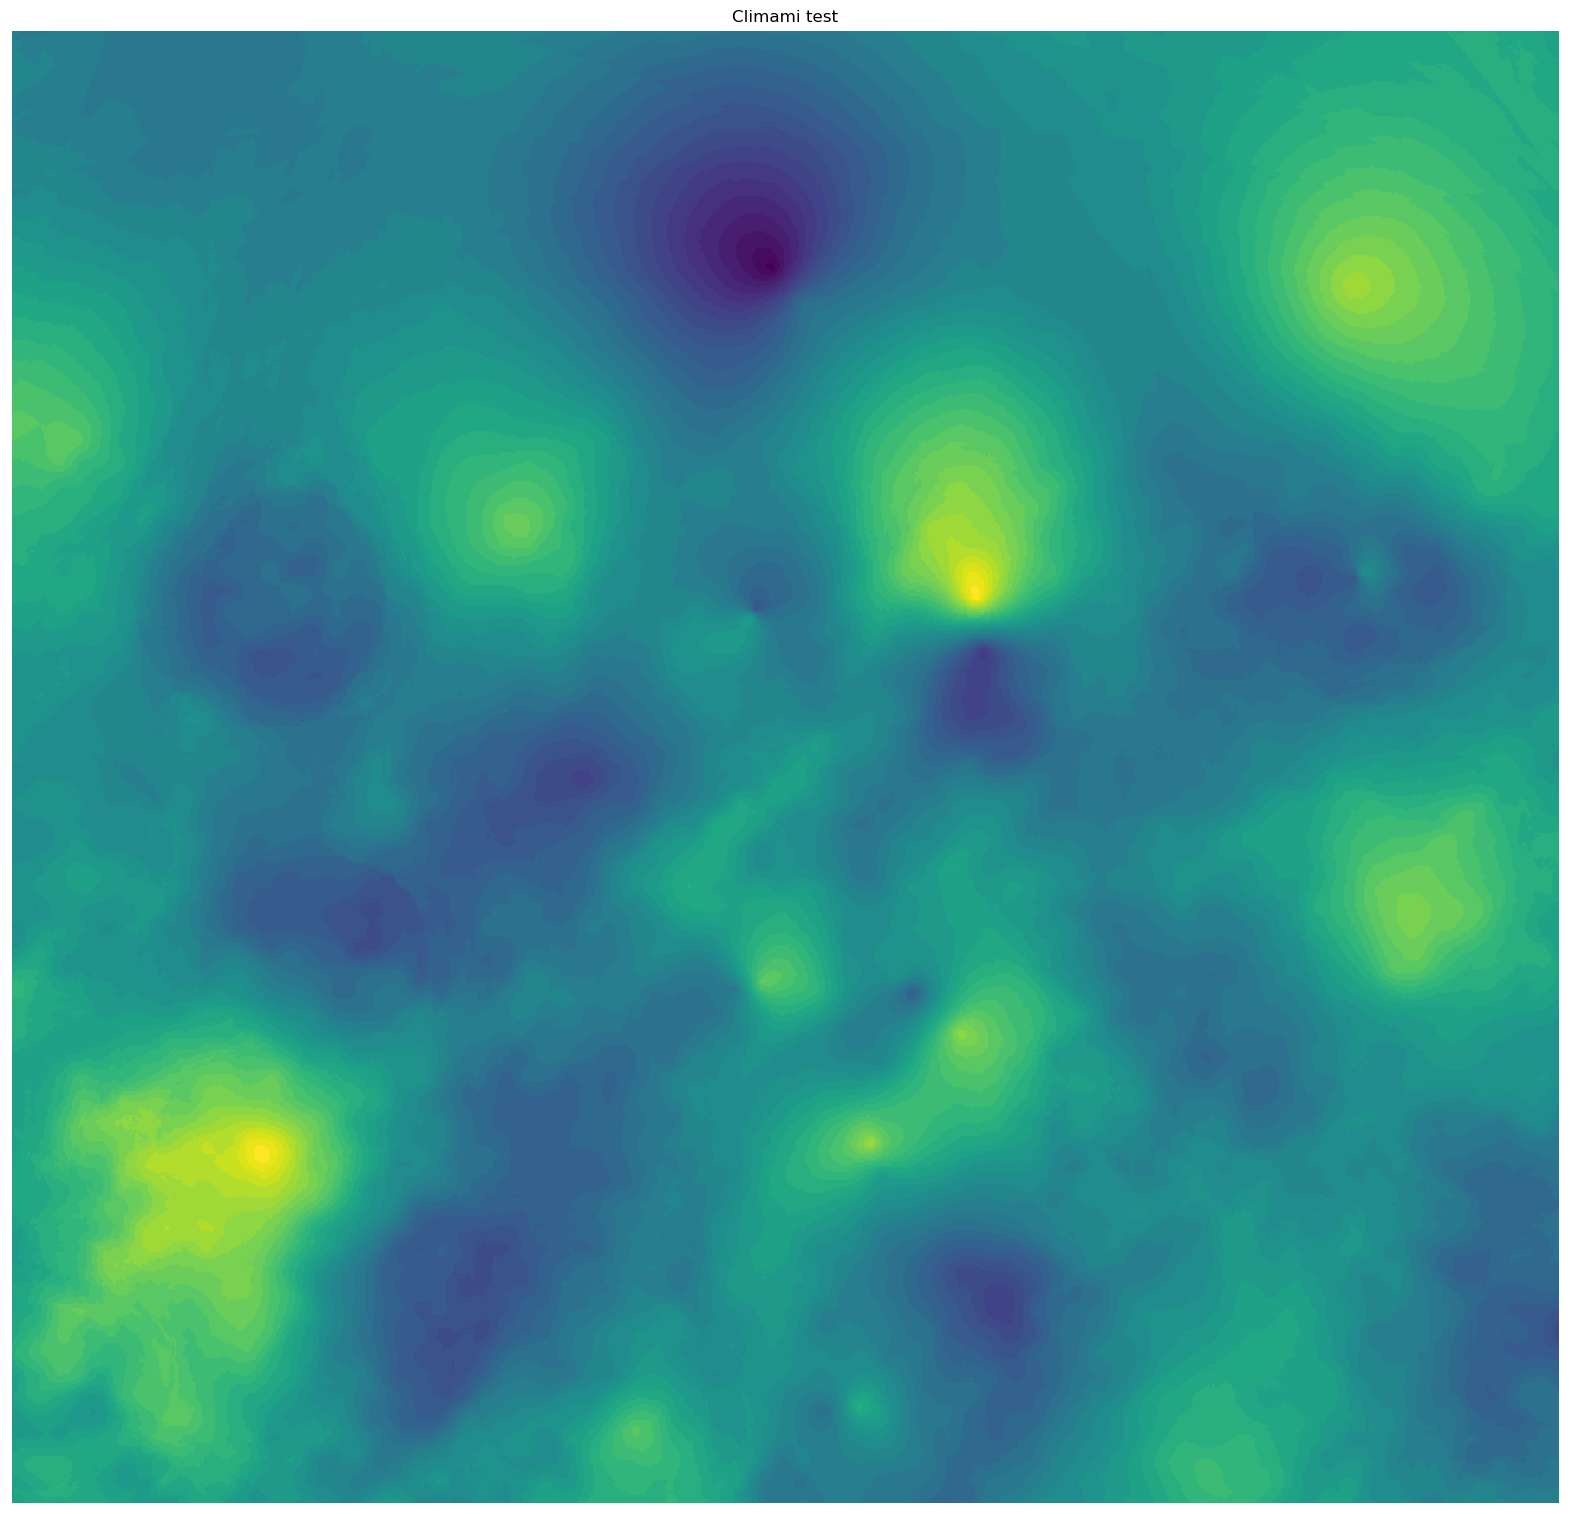

In [14]:
# Plot the RGB image
plt.figure(figsize = (20,20))
plt.imshow(climami_test*3)
plt.title('Climami test')
plt.axis('off')
plt.show()

In [15]:
product_classified = 'classified_images'
ds_classified = dc.load(product = product_classified, output_crs="epsg:32632", resolution=[30,30])
ds_classified

<xarray.Dataset>
Dimensions:            (time: 6, y: 1207, x: 1232)
Coordinates:
  * time               (time) datetime64[ns] 2023-02-09T10:30:00 ... 2023-08-...
  * y                  (y) float64 5.014e+06 5.014e+06 ... 5.05e+06 5.05e+06
  * x                  (x) float64 4.888e+05 4.889e+05 ... 5.257e+05 5.258e+05
    spatial_ref        int32 32632
Data variables:
    classified_images  (time, y, x) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

In [16]:
classified_test = ds_classified.sel(time='2023-08-08T10:30:00.000000000', method='nearest')['classified_images']

In [17]:
classified_test = classified_test.transpose('y', 'x')
classified_test = classified_test[::-1, :]

In [18]:
classified_test

<xarray.DataArray 'classified_images' (y: 1207, x: 1232)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time         datetime64[ns] 2023-08-08T10:30:00
  * y            (y) float64 5.05e+06 5.05e+06 5.05e+06 ... 5.014e+06 5.014e+06
  * x            (x) float64 4.888e+05 4.889e+05 ... 5.257e+05 5.258e+05
    spatial_ref  int32 32632
Attributes:
    units:         
    nodata:        nan
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

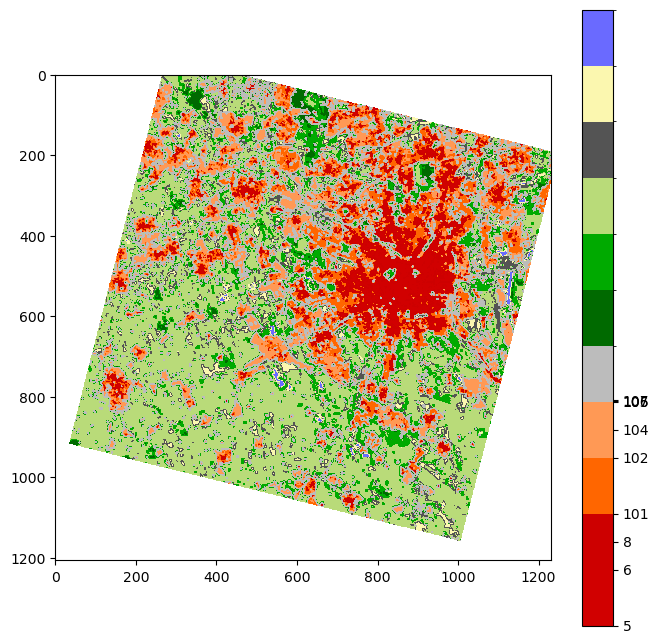

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Your colors_dict
colors_dict = {
    '2': '#D10000',
    '3': '#CD0000',
    '5': '#FF6600',
    '6': '#FF9955',
    '8': '#BCBCBC',
    '101': '#006A00',
    '102': '#00AA00',
    '104': '#B9DB79',
    '105': '#545454',
    '106': '#FBF7AF',
    '107': '#6A6AFF'
}

bounds = [int(key) for key in colors_dict.keys()]
bounds.append(bounds[-1] + 1)
norm = colors.BoundaryNorm(bounds, len(bounds) - 1)

# Assuming classified_test is a numpy array representing your raster data
# Make sure that the data in classified_test matches the keys in colors_dict

# Create a custom colormap
cmap_colors = [colors_dict[key] for key in colors_dict.keys()]
cmap = plt.cm.colors.ListedColormap(cmap_colors, name='LCZ_classes_colormap')

# Plot the raster data with a custom figure size and colormap
fig, ax = plt.subplots(figsize=(8, 8))

# Ensure that the extent and axis limits are correctly set if needed
# ax.set_xlim(0, classified_test.shape[1])
# ax.set_ylim(0, classified_test.shape[0])
# ax.set_aspect('equal')

im = ax.imshow(classified_test, cmap=cmap, norm=norm)

# Add a colorbar to indicate the color-value mapping
cbar = plt.colorbar(im, ax=ax, orientation='vertical', ticks=np.arange(len(colors_dict)))
cbar.set_ticklabels(colors_dict.keys())

plt.show()


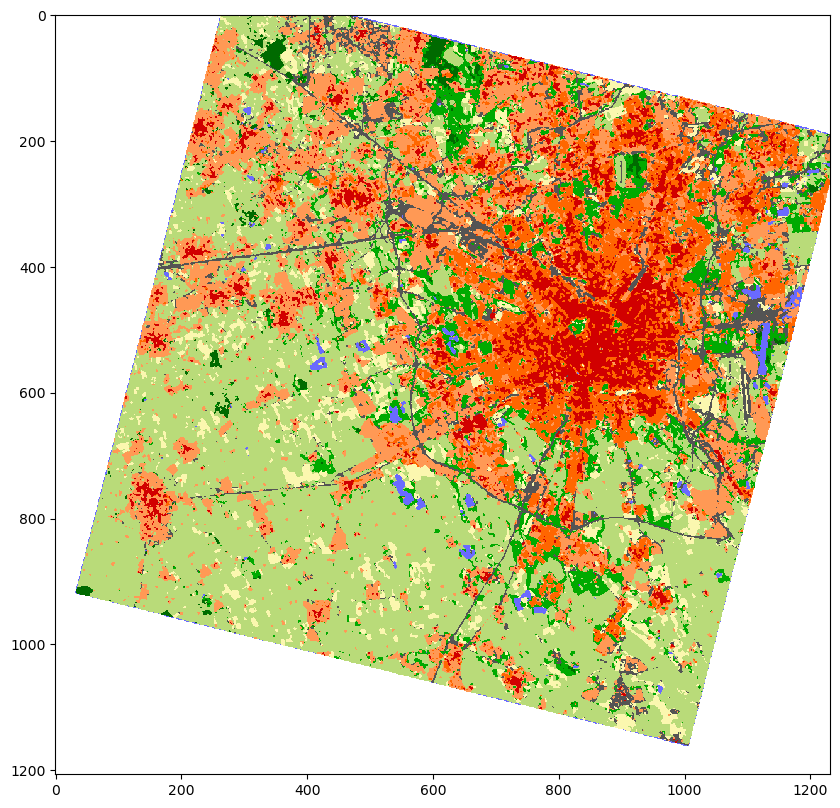

In [20]:
bounds = [int(key) for key in colors_dict.keys()]
bounds.append(bounds[-1]+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Generate a colormap
cmap_colors = [colors_dict[key] for key in colors_dict.keys()]
cmap = plt.cm.colors.ListedColormap(cmap_colors, name='LCZ classes colormap')
cmap

# Plot the raster data with a custom figure size and colormap
fig, ax = plt.subplots(figsize=(10, 10))

# Ensure that the extent and axis limits are correctly set if needed
# ax.set_xlim(0, classified_test.shape[1])
# ax.set_ylim(0, classified_test.shape[0])
# ax.set_aspect('equal')

im = ax.imshow(classified_test, cmap=cmap, norm=norm, interpolation='none')

plt.show()